In [8]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

In [9]:
# importing data
tracks = pd.read_csv('my_downloads_cleaned.csv', parse_dates=['Album Release Date'])
display(tracks.head())
display(tracks.info())
tracks.describe()

,Track Name,Artist Name,Artist Popularity,Album Release Date,Track Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track Duration (s)
0,Experience,Ludovico Einaudi,77,2013-01-01,80,0.447,0.449,2,-10.634,1,0.0376,0.9340,0.961000,0.0697,0.036,92.468,4,315.0
1,Pasoori,Shae Gill,61,2022-07-02,80,0.714,0.596,11,-6.206,0,0.0430,0.0657,0.000000,0.0625,0.669,91.991,4,224.0
2,Bhalobasha Baki,Popeye Bangladesh,33,2015-01-23,45,0.662,0.225,6,-10.849,1,0.0317,0.7110,0.000000,0.2890,0.377,145.907,4,311.0
3,I Can't Handle Change,Roar,69,2010-03-14,82,0.247,0.438,5,-8.478,1,0.0358,0.0447,0.000867,0.1110,0.390,185.711,3,198.0
4,Wildest Dreams,Taylor Swift,100,2014-01-01,83,0.553,0.664,8,-7.417,1,0.0741,0.0709,0.005600,0.1060,0.467,140.060,4,220.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Track Name          292 non-null    object        
 1   Artist Name         292 non-null    object        
 2   Artist Popularity   292 non-null    int64         
 3   Album Release Date  292 non-null    datetime64[ns]
 4   Track Popularity    292 non-null    int64         
 5   Danceability        292 non-null    float64       
 6   Energy              292 non-null    float64       
 7   Key                 292 non-null    int64         
 8   Loudness            292 non-null    float64       
 9   Mode                292 non-null    int64         
 10  Speechiness         292 non-null    float64       
 11  Acousticness        292 non-null    float64       
 12  Instrumentalness    292 non-null    float64       
 13  Liveness            292 non-null    float64       

None

,Artist Popularity,Album Release Date,Track Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track Duration (s)
count,292.000000,292,292.000000,292.00000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,70.452055,2013-04-11 23:10:41.095890432,67.253425,0.58449,0.605188,5.517123,-7.488346,0.667808,0.068185,0.294660,0.086580,0.165762,0.442318,119.156705,3.958904,239.517123
min,0.000000,1973-05-01 00:00:00,0.000000,0.15000,0.016700,0.000000,-29.745000,0.000000,0.022700,0.000035,0.000000,0.042600,0.036000,65.043000,3.000000,84.000000
25%,63.000000,2011-11-06 12:00:00,59.000000,0.48250,0.480500,2.000000,-8.907250,0.000000,0.032875,0.045825,0.000000,0.095550,0.232000,94.995250,4.000000,201.000000
50%,75.500000,2016-02-19 00:00:00,76.500000,0.59550,0.629500,6.000000,-6.666000,1.000000,0.042150,0.188500,0.000016,0.119000,0.440500,117.126000,4.000000,231.000000
75%,84.000000,2019-07-13 18:00:00,83.000000,0.70425,0.758000,8.000000,-5.338000,1.000000,0.073800,0.515750,0.006100,0.174500,0.602750,136.930000,4.000000,271.000000
max,100.000000,2023-01-26 00:00:00,94.000000,0.93600,0.996000,11.000000,-1.815000,1.000000,0.449000,0.979000,0.961000,0.832000,0.964000,207.970000,5.000000,546.000000
std,18.980396,NaN,23.801675,0.15805,0.202676,3.447652,3.642327,0.471808,0.064932,0.289877,0.223458,0.121160,0.234856,29.617583,0.258909,65.847238


In [10]:
# top 15 artists with most song in my playlist
tracks.groupby('Artist Name')['Track Name'].count().sort_values(ascending=False)[:15]

Artist Name
One Direction           12
The Weeknd               9
Pritam                   8
Cigarettes After Sex     7
Queen                    6
Imagine Dragons          5
The Chainsmokers         4
Post Malone              4
Atif Aslam               3
Taylor Swift             3
Mohit Chauhan            3
Arnob                    3
Anuv Jain                3
Ed Sheeran               3
Avicii                   3
Name: Track Name, dtype: int64

In [11]:
# Top 10 popular artists in my playlist
tracks[['Artist Name','Artist Popularity']].groupby('Artist Name').mean('Artist Popularity')\
.sort_values('Artist Popularity',ascending=False)[:10]

,Artist Popularity
Artist Name,
Taylor Swift,100.0
The Weeknd,95.0
Drake,95.0
21 Savage,90.0
Eminem,90.0
Ed Sheeran,90.0
Arijit Singh,89.0
Kendrick Lamar,89.0
Travis Scott,89.0


<Axes: >

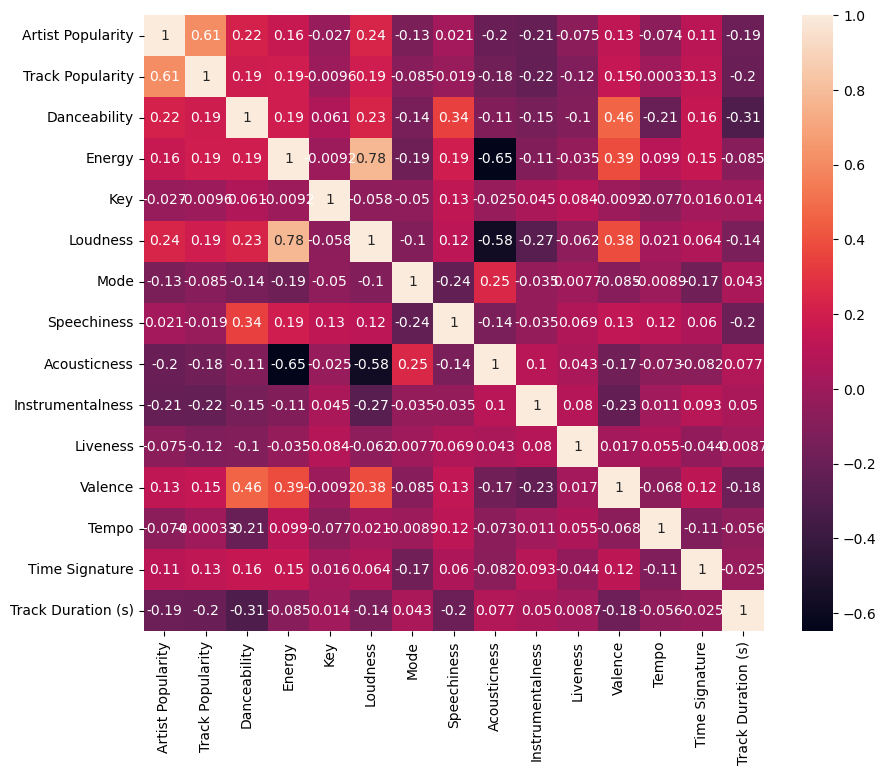

In [12]:
track_corr = tracks[['Artist Popularity',
       'Track Popularity', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Time Signature', 'Track Duration (s)']].corr()
fig,ax = plt.subplots(1,1,figsize=[10,8])
sns.heatmap(track_corr,annot=True,ax=ax)

In [13]:
tracks_year = tracks[['Track Name','Track Popularity','Album Release Date']].copy()
tracks_year['Release Year'] = tracks_year['Album Release Date'].dt.year
tracks_year.groupby('Release Year')\
    .agg({'Track Name':'count','Track Popularity':'mean'})\
    .loc[2010:]\
    .sort_values('Track Name',ascending=False)

,Track Name,Track Popularity
Release Year,,
2017,27,73.000000
2018,24,69.250000
2021,23,55.826087
2015,21,68.380952
2022,21,58.714286
2013,20,69.150000
2020,19,74.736842
2019,18,68.666667
2012,16,53.875000


In [38]:
tracks_features = tracks[['Album Release Date','Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Time Signature', 'Track Duration (s)']].copy()
tracks_features['Release Year'] = tracks_features['Album Release Date'].dt.year


tracks_features_by_year = tracks_features.groupby('Release Year').mean()\
    .loc[2010:2022]

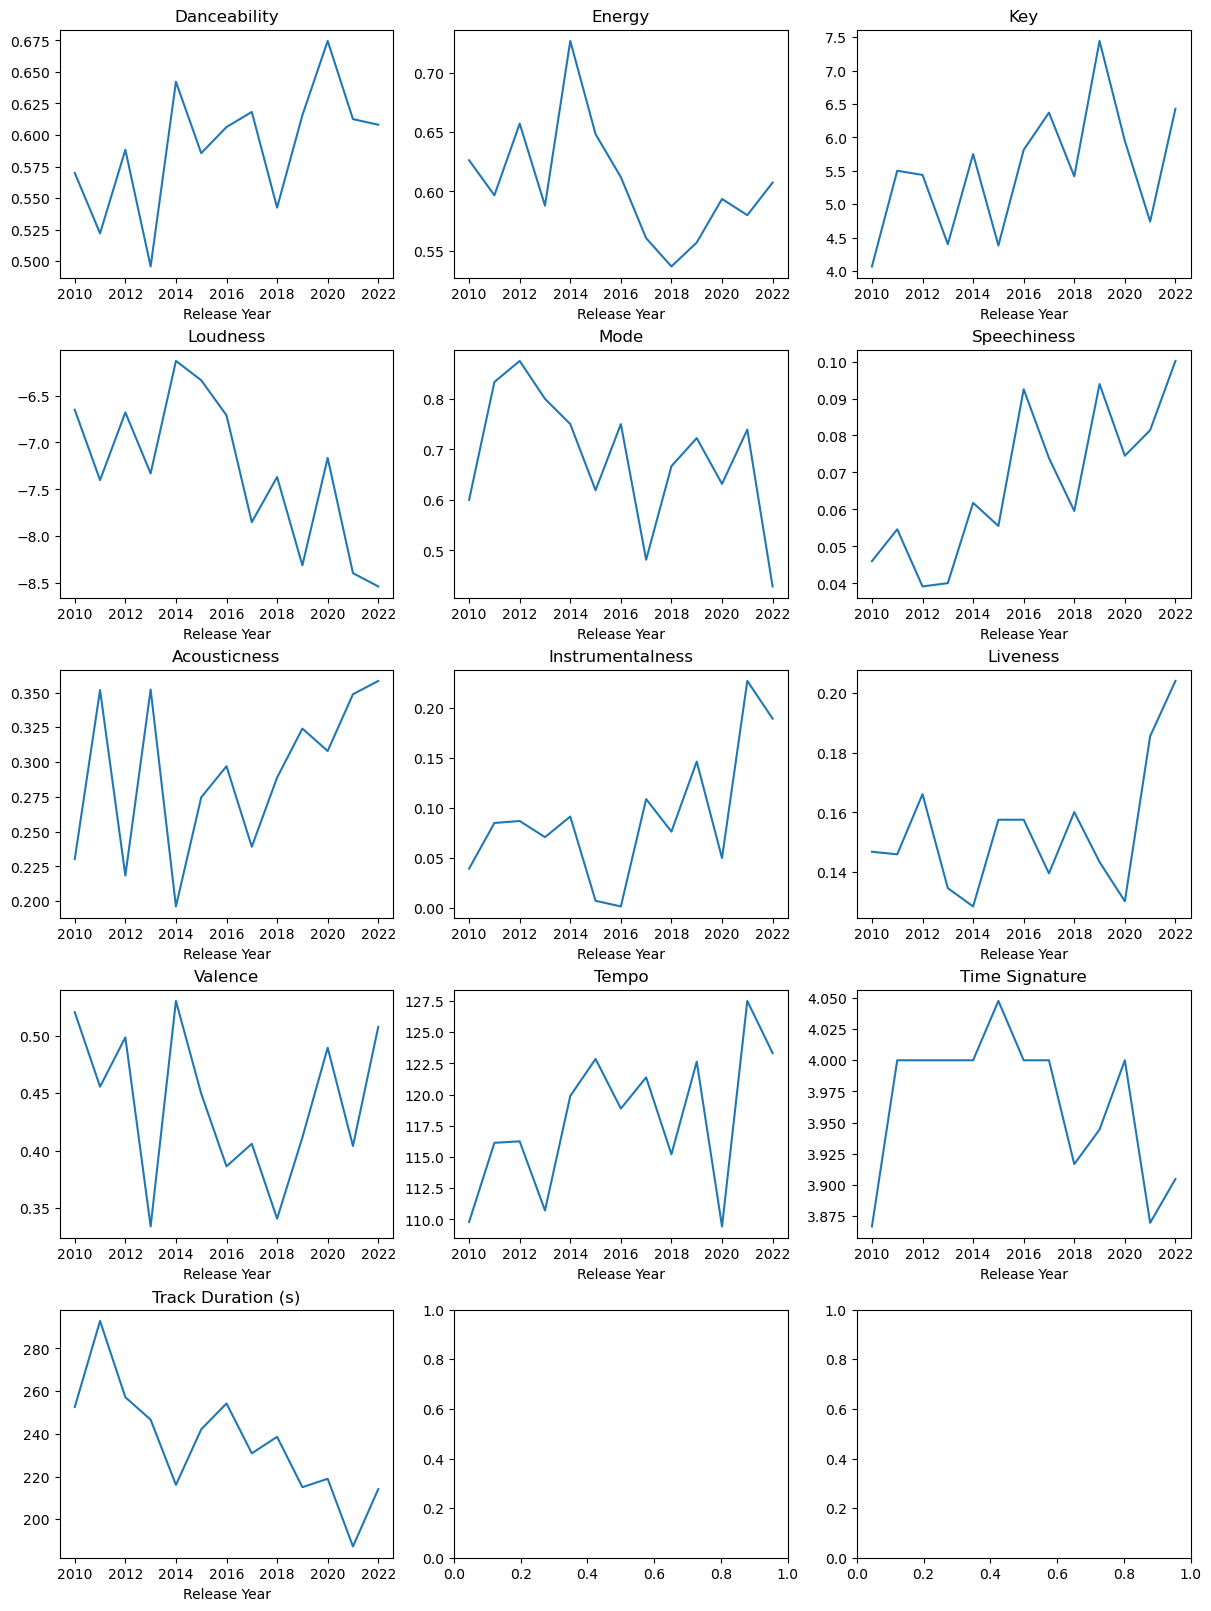

In [39]:
# plottting features over the years in 2010-2022
cols = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Time Signature', 'Track Duration (s)']

fig, ax = plt.subplots(5,3,figsize=[12,16],constrained_layout = True)
i=0;j=0
for col in cols:
    tracks_features_by_year[col].plot(ax = ax[i,j])
    ax[i,j].set_title(col)
    j = j+1
    if j%3==0: i = i+1;j=0